# Projeto de Análise - Household Power Consumption

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Questão 1: Carregar dataset e exibir as 10 primeiras linhas

In [2]:

df = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    decimal=".",
    na_values="?"
)
df.head(10)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


## Questão 2: Diferença entre Global_active_power e Global_reactive_power


- **Global_active_power**: potência ativa consumida pela residência, medida em kW, que realmente realiza trabalho útil (ex: funcionamento de aparelhos).
- **Global_reactive_power**: potência reativa, medida em kW, que não realiza trabalho útil mas é necessária para manter os campos elétricos/magnéticos nos equipamentos.


## Questão 3: Valores ausentes

In [3]:

missing = df.isna().sum()
print(missing)
print("Total de valores ausentes:", missing.sum())


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Total de valores ausentes: 181853


## Questão 4: Converter Date para datetime e criar coluna dia da semana

In [4]:

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['DayOfWeek'] = df['Date'].dt.day_name()
df[['Date','DayOfWeek']].head()


,Date,DayOfWeek
0,2006-12-16,Saturday
1,2006-12-16,Saturday
2,2006-12-16,Saturday
3,2006-12-16,Saturday
4,2006-12-16,Saturday


## Questão 5: Filtrar ano 2007 e calcular média de consumo diário de Global_active_power

In [5]:

df_2007 = df[df['Date'].dt.year == 2007]
daily_avg_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
daily_avg_2007.head()


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64

## Questão 6: Gráfico de linha de Global_active_power em um único dia

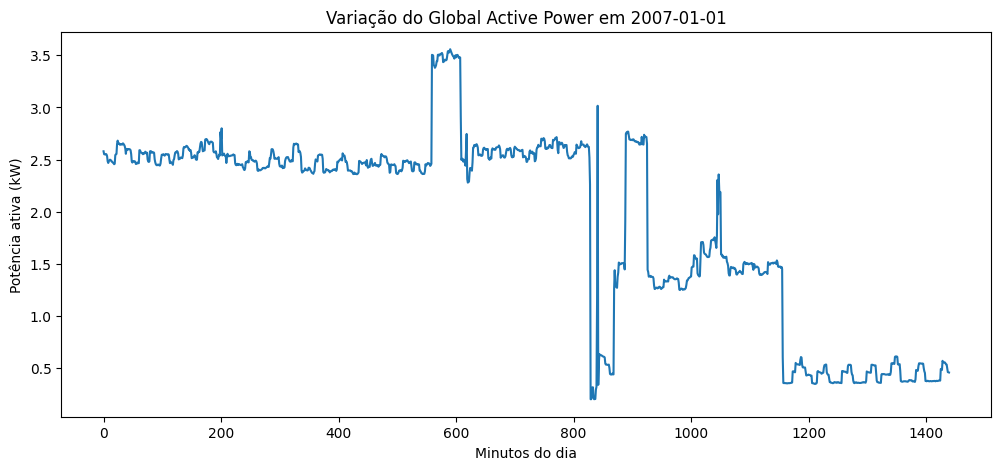

In [6]:

day_sample = df_2007[df_2007['Date'] == '2007-01-01']
plt.figure(figsize=(12,5))
plt.plot(day_sample['Global_active_power'].reset_index(drop=True))
plt.title("Variação do Global Active Power em 2007-01-01")
plt.xlabel("Minutos do dia")
plt.ylabel("Potência ativa (kW)")
plt.show()


## Questão 7: Histograma de Voltage

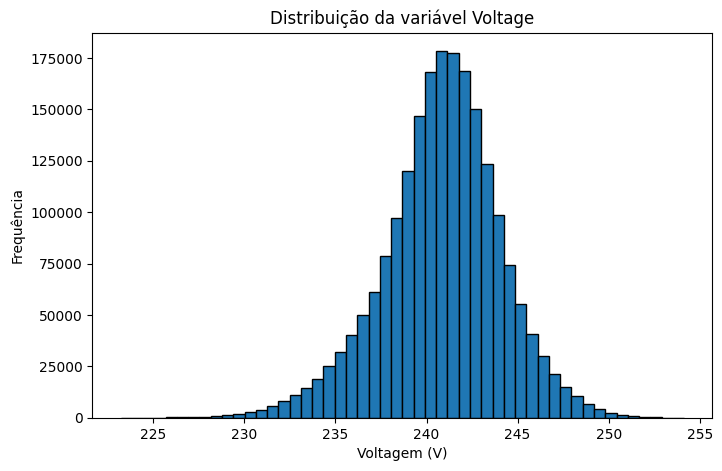

In [7]:

plt.figure(figsize=(8,5))
plt.hist(df['Voltage'].dropna(), bins=50, edgecolor='black')
plt.title("Distribuição da variável Voltage")
plt.xlabel("Voltagem (V)")
plt.ylabel("Frequência")
plt.show()


**Observação:** A distribuição é aproximadamente normal, centrada em torno de 240 volts, com pouca variação.

## Questão 8: Consumo médio por mês em todo o período

In [8]:

df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('YearMonth')['Global_active_power'].mean()
monthly_avg.head()


YearMonth
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64

## Questão 9: Dia com maior consumo de energia ativa global

In [9]:

daily_sum = df.groupby('Date')['Global_active_power'].sum()
max_day = daily_sum.idxmax()
max_day, daily_sum.max()


(Timestamp('2006-12-23 00:00:00'), 4773.386)

## Questão 10: Comparação consumo médio em dias de semana vs finais de semana

In [10]:

df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
weekday_avg = df.groupby('IsWeekend')['Global_active_power'].mean()
weekday_avg


IsWeekend
False    1.035472
True     1.234232
Name: Global_active_power, dtype: float64

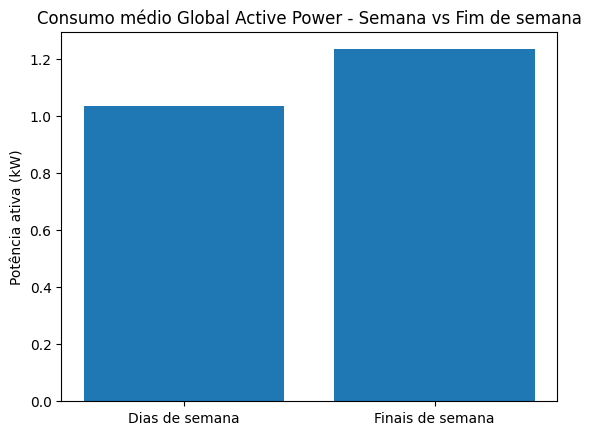

In [11]:

labels = ['Dias de semana','Finais de semana']
plt.bar(labels, weekday_avg)
plt.title("Consumo médio Global Active Power - Semana vs Fim de semana")
plt.ylabel("Potência ativa (kW)")
plt.show()


# Questão 11

In [12]:
corr_cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
corr_matrix = df[corr_cols].corr()
print(corr_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


# Questão 12

In [13]:
df['Total_Sub_metering'] = (
    df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].sum(axis=1)
)


# Questão 13

In [14]:
sm_cols = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
df['Total_Sub_metering_power_kW'] = df[sm_cols].sum(axis=1) * 60.0 / 1000.0

monthly_corr = pd.DataFrame({
    'GAP_kW_mean': df.resample('ME', on='Date')['Global_active_power'].mean(),
    'TSM_kW_mean': df.resample('ME', on='Date')['Total_Sub_metering_power_kW'].mean()
}).dropna()

monthly_corr['TSM_gt_GAP'] = monthly_corr['TSM_kW_mean'] > monthly_corr['GAP_kW_mean']

meses_excedem = monthly_corr[monthly_corr['TSM_gt_GAP']]
print(meses_excedem)

Empty DataFrame
Columns: [GAP_kW_mean, TSM_kW_mean, TSM_gt_GAP]
Index: []


# Questão 14

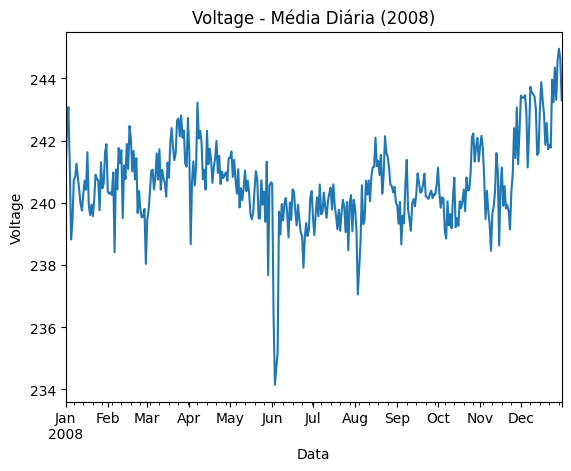

In [15]:
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

mask_2008 = df['Date'].dt.year == 2008

voltage_2008_daily = (
    df.loc[mask_2008, ['Date', 'Voltage']]
      .resample('D', on='Date')['Voltage']
      .mean()
)

plt.figure()
voltage_2008_daily.plot()
plt.title("Voltage - Média Diária (2008)")
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.show()


# Questão 15

In [16]:
df.index = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'], dayfirst=True, errors='coerce')

df['month'] = df.index.month
summer_months = [6,7,8]
winter_months = [12,1,2]

summer_mean = df.loc[df['month'].isin(summer_months), 'Global_active_power'].mean()
winter_mean = df.loc[df['month'].isin(winter_months), 'Global_active_power'].mean()

print("Verão:", summer_mean)
print("Inverno:", winter_mean)


C:\Users\marco\AppData\Local\Temp\ipykernel_928\1597393344.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df.index = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'], dayfirst=True, errors='coerce')


Verão: 0.7266815219278782
Inverno: 1.4176230462106605


# Questão 16

In [17]:
gap_full = df['Global_active_power']
sample_1pct = gap_full.sample(frac=0.01, random_state=42)

summary = pd.DataFrame({
    'Métrica': ['count','mean','std','min','25%','50%','75%','max'],
    'Completa': [
        gap_full.count(), gap_full.mean(), gap_full.std(),
        gap_full.min(), gap_full.quantile(0.25), gap_full.median(),
        gap_full.quantile(0.75), gap_full.max()
    ],
    'Amostra_1pct': [
        sample_1pct.count(), sample_1pct.mean(), sample_1pct.std(),
        sample_1pct.min(), sample_1pct.quantile(0.25), sample_1pct.median(),
        sample_1pct.quantile(0.75), sample_1pct.max()
    ]
})
print(summary)


  Métrica      Completa  Amostra_1pct
0   count  2.049280e+06  20486.000000
1    mean  1.091615e+00      1.097499
2     std  1.057294e+00      1.049284
3     min  7.600000e-02      0.078000
4     25%  3.080000e-01      0.308000
5     50%  6.020000e-01      0.608000
6     75%  1.528000e+00      1.542000
7     max  1.112200e+01      7.878000


# Questão 17

In [18]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['Global_active_power','Global_reactive_power',
              'Voltage','Global_intensity','Total_Sub_metering']

scaled_df = df[scale_cols].dropna()
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(scaled_df.values)

scaled_df_mm = pd.DataFrame(
    scaled_values, index=scaled_df.index,
    columns=[c + "_scaled" for c in scale_cols]
)
print(scaled_df_mm.head())


                     Global_active_power_scaled  Global_reactive_power_scaled  \
2006-12-16 17:24:00                    0.374796                      0.300719   
2006-12-16 17:25:00                    0.478363                      0.313669   
2006-12-16 17:26:00                    0.479631                      0.358273   
2006-12-16 17:27:00                    0.480898                      0.361151   
2006-12-16 17:28:00                    0.325005                      0.379856   

                     Voltage_scaled  Global_intensity_scaled  \
2006-12-16 17:24:00        0.376090                 0.377593   
2006-12-16 17:25:00        0.336995                 0.473029   
2006-12-16 17:26:00        0.326010                 0.473029   
2006-12-16 17:27:00        0.340549                 0.473029   
2006-12-16 17:28:00        0.403231                 0.323651   

                     Total_Sub_metering_scaled  
2006-12-16 17:24:00                   0.134328  
2006-12-16 17:25:00           

# Questão 18

In [19]:
from sklearn.cluster import KMeans

daily_features = df[scale_cols].resample('D').mean().dropna()
scaler_km = MinMaxScaler()
daily_scaled = scaler_km.fit_transform(daily_features.values)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(daily_scaled)

daily_clusters = daily_features.copy()
daily_clusters['cluster'] = clusters

print(daily_clusters['cluster'].value_counts())
print(kmeans.cluster_centers_)


cluster
0    689
2    463
1    281
Name: count, dtype: int64
[[0.3101501  0.22576734 0.61849643 0.30496857 0.41553663]
 [0.47282621 0.36536744 0.60654112 0.46778579 0.63458101]
 [0.15627811 0.32149849 0.5571688  0.15693914 0.23284948]]


# Questão 19

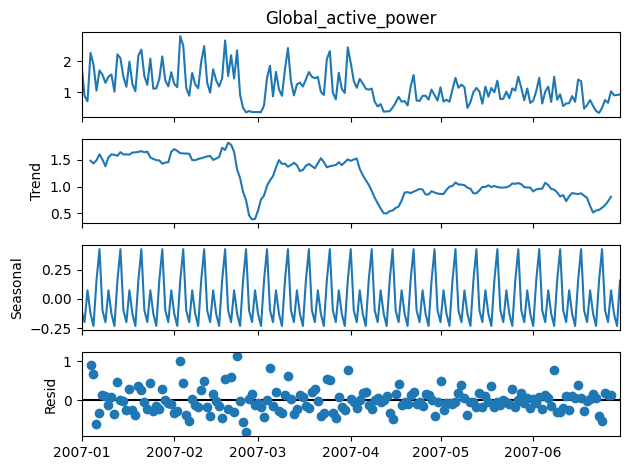

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

gap_6m = df['Global_active_power'].loc['2007-01-01':'2007-06-30'] \
           .resample('D').mean().interpolate(limit_direction='both')

decomp = seasonal_decompose(gap_6m, model='additive', period=7)

decomp.plot()
plt.show()


# Questão 20

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train = df.loc['2007', ['Global_active_power','Global_intensity']].dropna()
test  = df.loc['2008', ['Global_active_power','Global_intensity']].dropna()

X_train = train[['Global_intensity']].values
y_train = train['Global_active_power'].values
X_test  = test[['Global_intensity']].values
y_test  = test['Global_active_power'].values

linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print("Coef:", linreg.coef_[0], "Intercept:", linreg.intercept_)
print("RMSE:", rmse, "R²:", r2)


Coef: 0.23664804727091682 Intercept: -0.010502142752368604
RMSE: 0.04858545617604111 R²: 0.9979203321055357


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Questão 21

C:\Users\marco\AppData\Local\Temp\ipykernel_928\1234165887.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df['Global_active_power'].resample('H').mean()


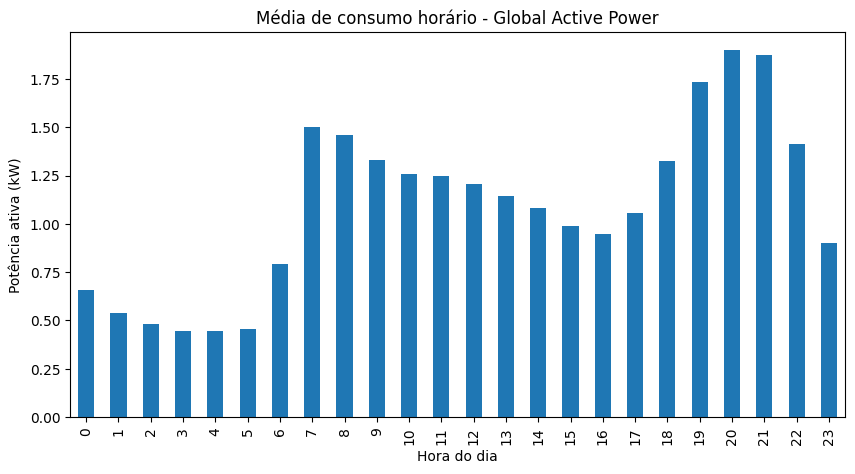

In [22]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.set_index('DateTime')
 
hourly_avg = df['Global_active_power'].resample('H').mean()

hourly_mean_by_hour = hourly_avg.groupby(hourly_avg.index.hour).mean()
hourly_mean_by_hour.plot(kind='bar', figsize=(10,5))
plt.title("Média de consumo horário - Global Active Power")
plt.xlabel("Hora do dia")
plt.ylabel("Potência ativa (kW)")
plt.show()

# Questão 22

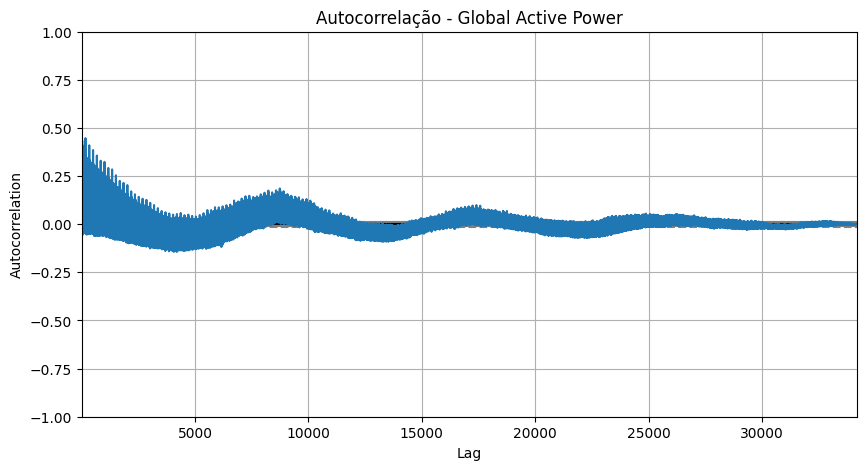

Autocorrelação 1h: 0.713455594691645
Autocorrelação 24h: 0.435907225911991
Autocorrelação 48h: 0.4012692620450163


In [24]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(hourly_avg.dropna())
plt.title("Autocorrelação - Global Active Power")
plt.show()

lag_1h = hourly_avg.autocorr(lag=1)
lag_24h = hourly_avg.autocorr(lag=24)
lag_48h = hourly_avg.autocorr(lag=48)
 
print("Autocorrelação 1h:", lag_1h)
print("Autocorrelação 24h:", lag_24h)
print("Autocorrelação 48h:", lag_48h)

# Questão 23

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[features].dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
 
print("Variância explicada:", pca.explained_variance_ratio_)

Variância explicada: [0.59103759 0.22718543]


# Questão 24

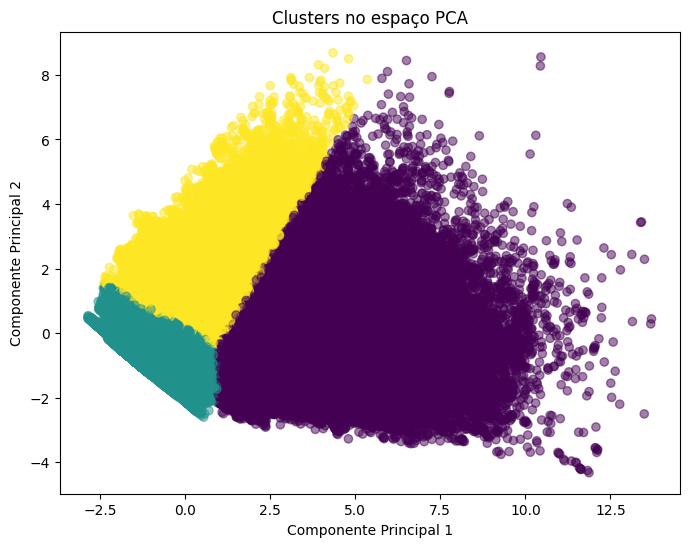

In [26]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(components)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Clusters no espaço PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Questão 25

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Linear: 0.969135832624744
RMSE Polinomial: 0.9648154069545046


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


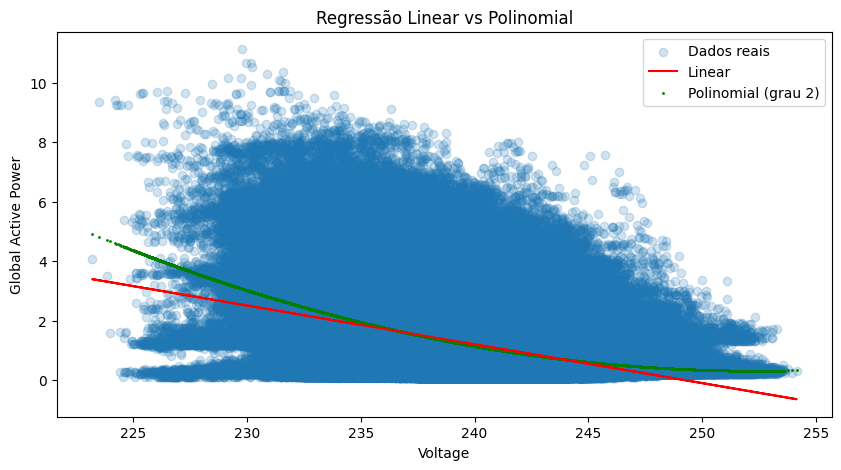

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['Voltage']].dropna()
y = df.loc[X.index, 'Global_active_power']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
 
# Erros
rmse_lin = mean_squared_error(y, y_pred_lin, squared=False)
rmse_poly = mean_squared_error(y, y_pred_poly, squared=False)
 
print("RMSE Linear:", rmse_lin)
print("RMSE Polinomial:", rmse_poly)
 
# Visualização
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.2, label="Dados reais")
plt.plot(X, y_pred_lin, color="red", label="Linear")
plt.scatter(X, y_pred_poly, color="green", s=1, label="Polinomial (grau 2)")
plt.xlabel("Voltage")
plt.ylabel("Global Active Power")
plt.title("Regressão Linear vs Polinomial")
plt.legend()
plt.show()

# Questão 26

In [29]:
df_appl = pd.read_csv("energydata_complete.csv")

print(df_appl.info())
print(df_appl.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Questão 27

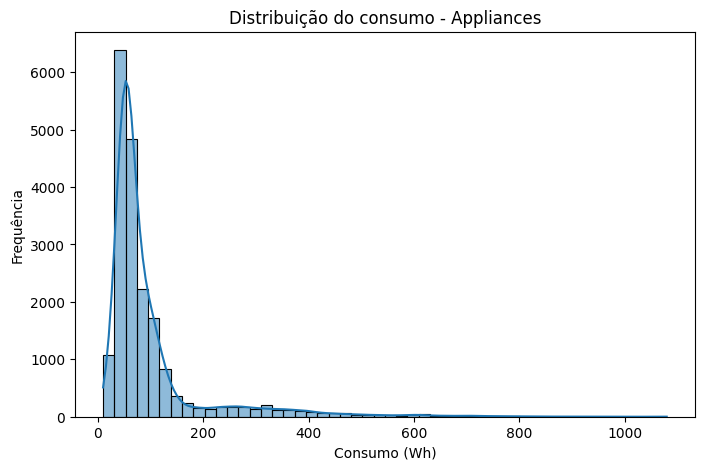

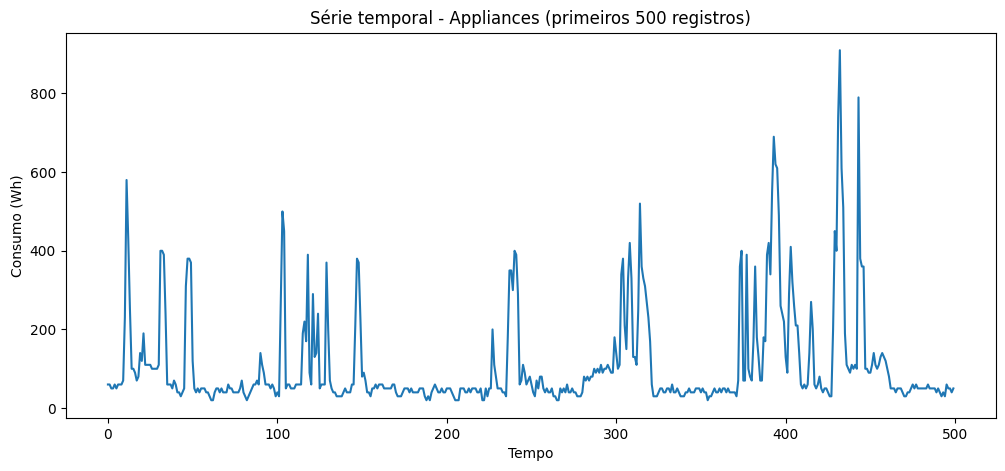

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df_appl['Appliances'], bins=50, kde=True)
plt.title("Distribuição do consumo - Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_appl['Appliances'].head(500))
plt.title("Série temporal - Appliances (primeiros 500 registros)")
plt.xlabel("Tempo")
plt.ylabel("Consumo (Wh)")
plt.show()

# Questão 28

Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
Name: Appliances, dtype: float64
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


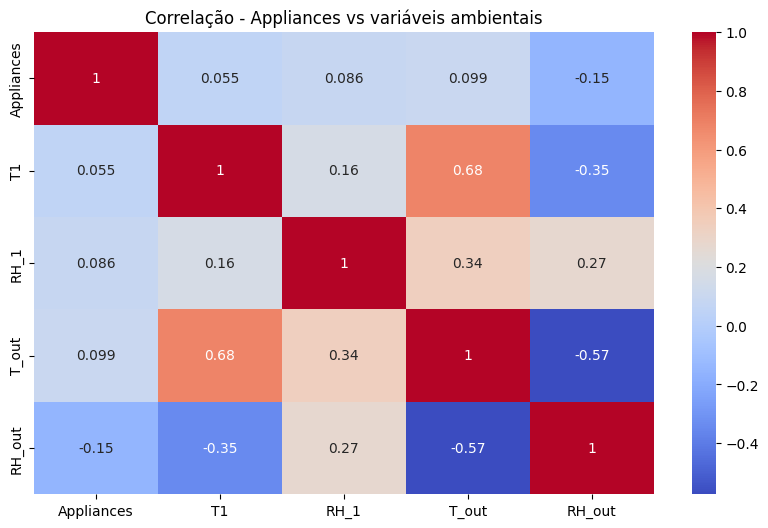

In [32]:
# Exclui a coluna 'date' para evitar erro de conversão
corr = df_appl.drop(columns=['date']).corr()['Appliances'].sort_values(ascending=False)
print(corr.head(10))
print(corr.tail(10))
 
plt.figure(figsize=(10,6))
sns.heatmap(df_appl[['Appliances','T1','RH_1','T_out','RH_out']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação - Appliances vs variáveis ambientais")
plt.show()

# Questão 29

In [33]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
numeric_cols = df_appl.select_dtypes(include=['float64','int64']).columns
df_scaled = df_appl.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_appl[numeric_cols])
 
df_scaled.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


# Questão 30

Variância explicada: [0.36089668 0.20905617]


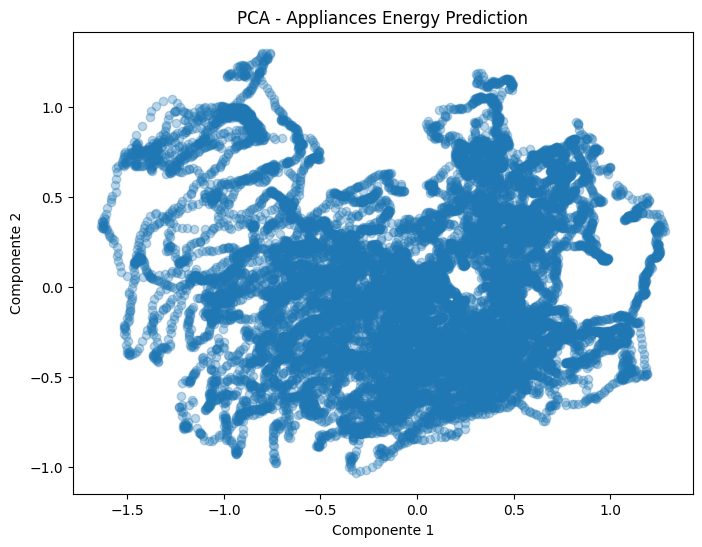

In [34]:
# Selecionar variáveis numéricas
df_pca_app = df_scaled[numeric_cols].dropna()
 
# PCA para 2 componentes
pca_app = PCA(n_components=2)
components_app = pca_app.fit_transform(df_pca_app)
 
print("Variância explicada:", pca_app.explained_variance_ratio_)
 
# Visualizar
plt.figure(figsize=(8,6))
plt.scatter(components_app[:,0], components_app[:,1], alpha=0.3)
plt.title("PCA - Appliances Energy Prediction")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

# Questão 31

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Selecionar features ambientais
X = df_appl[['T1','RH_1','T_out','RH_out']]
y = df_appl['Appliances']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

Coeficientes: [ 1.75576295  5.75802703 -3.19408263 -2.04863507]
Intercepto: 15.236604703434807
RMSE: 97.4266078623618
R²: 0.05147821376400652


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Questão 32

In [36]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
 
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))
 
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Linear Regression - R²:", r2_score(y_test, y_pred))

Random Forest - RMSE: 75.4063755822225
Random Forest - R²: 0.4317907746616827
Linear Regression - RMSE: 97.4266078623618
Linear Regression - R²: 0.05147821376400652


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Questão 33

K=3 - Inertia: 1198.6346894532785
K=4 - Inertia: 1006.6660823019629
K=5 - Inertia: 895.2439335609513


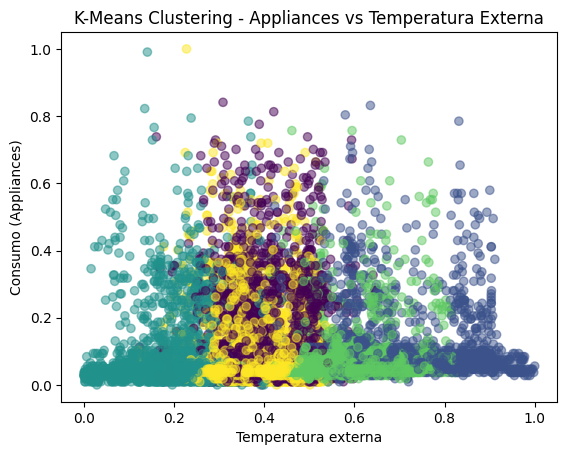

In [37]:
from sklearn.cluster import KMeans
 
X_cluster = df_scaled[['Appliances','T1','RH_1','T_out','RH_out']].dropna()
 
for k in [3,4,5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_cluster)
    print(f"K={k} - Inertia: {kmeans.inertia_}")
 
plt.scatter(X_cluster['T_out'], X_cluster['Appliances'], c=clusters, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering - Appliances vs Temperatura Externa")
plt.xlabel("Temperatura externa")
plt.ylabel("Consumo (Appliances)")
plt.show()

# Questão 34

In [38]:
df_appl['HighConsumption'] = np.where(df_appl['Appliances'] > df_appl['Appliances'].median(), 1, 0)
df_appl[['Appliances','HighConsumption']].head()

,Appliances,HighConsumption
0,60,0
1,60,0
2,50,0
3,50,0
4,60,0


# Questão 35

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 
X = df_appl[['T1','RH_1','T_out','RH_out']]
y = df_appl['HighConsumption']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
 
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[[1620  507]
 [ 864  956]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2127
           1       0.65      0.53      0.58      1820

    accuracy                           0.65      3947
   macro avg       0.65      0.64      0.64      3947
weighted avg       0.65      0.65      0.65      3947



# Questão 36

No **Orange Data Mining**, o dataset foi importado usando o widget **File**.  
Visualizamos os dados brutos com o widget **Data Table**, confirmando o carregamento correto das variáveis de consumo e ambientais.

# Questão 37

Utilizamos o widget **Data Sampler** configurado para selecionar 1% das instâncias.  
A amostra foi comparada com o dataset original através do widget **Distribution**, confirmando que a distribuição das variáveis se manteve consistente.

# Questão 38

Com o widget **Distribution**, exploramos a variável `Global_active_power`.  
O histograma mostrou concentração próxima a valores baixos, com poucos picos em consumos mais altos.

# Questão 39

No widget **Scatter Plot**, analisamos a relação entre **Voltage** e **Global_intensity**.  
O gráfico evidenciou uma correlação inversa: quanto maior a intensidade da corrente, menor tende a ser a tensão registrada.

# Questão 40

Aplicamos o widget **K-Means** configurado para 3 clusters, usando `Sub_metering_1`, `Sub_metering_2` e `Sub_metering_3`.  
O resultado evidenciou grupos distintos de consumo:  
- Baixo uso em todos submedidores  
- Consumo intermediário em `Sub_metering_1`  
- Alto uso em `Sub_metering_2` e `Sub_metering_3`